Literal 1: Ejecutar con tasa de aprendizaje 0.01
Convergencia alcanzada en la iteración 397
Error cuadrático medio: 0.009184801718990615


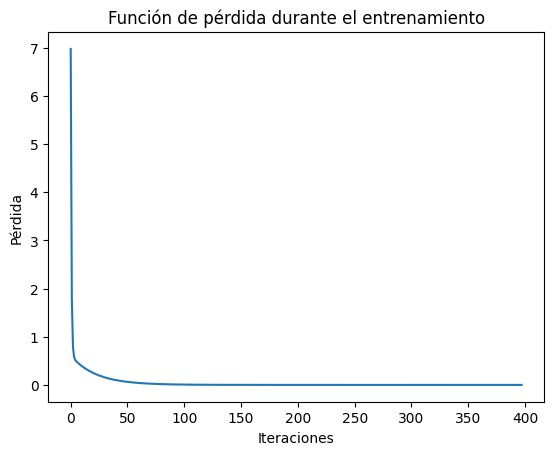


Literal 1: Ejecutar con tasa de aprendizaje 0.1
Advertencia: y_pred contiene NaN

Literal 3: Cambiar variable objetivo a ancho del sépalo
Error cuadrático medio: 0.01101548537203658


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/xk/5r8qcfrs4651xzqmk_try53r0000gn/T/ipykernel_85556/1495721922.py:26: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(errors ** 2)
/var/folders/xk/5r8qcfrs4651xzqmk_try53r0000gn/T/ipykernel_85556/1495721922.py:30: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(history[-1] - history[-2]) < tolerance:
/var/folders/xk/5r8qcfrs4651xzqmk_try53r0000gn/T/ipykernel_85556/1495721922.py:23: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * gradient


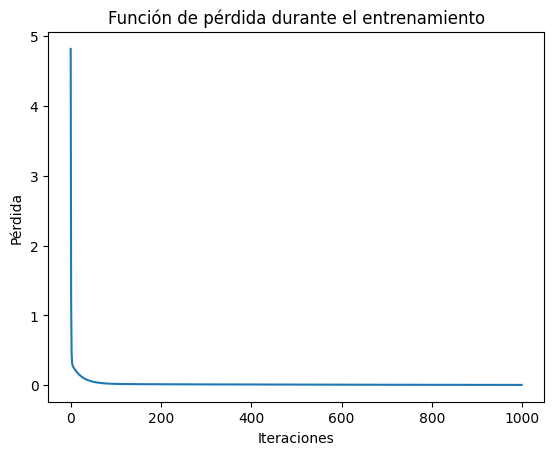


Literal 3: Cambiar variable objetivo a ancho del pétalo
Error cuadrático medio: 0.04704730183437925


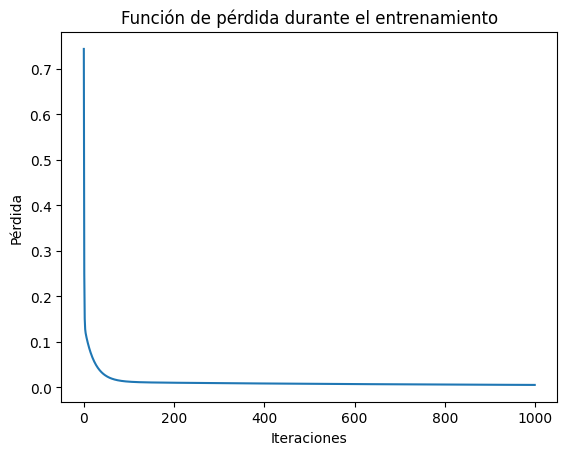

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error

# Cargar los datos de Iris
def load_iris_data():
    iris = load_iris()
    X = iris.data  # Características
    y = X[:, 2]   # Largo del pétalo (por defecto en literal 1 y 2)
    return X, y

# Gradiente descendente con criterio de parada basado en la función de costo
def gradient_descent(X, y, learning_rate, max_iterations, tolerance=1e-6):
    m = len(y)
    weights = np.zeros(X.shape[1])  # Inicializamos los pesos en 0
    history = []  # Historia de la función de pérdida (costo)

    for i in range(max_iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        weights -= learning_rate * gradient
        
        # Cálculo de la función de costo
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        history.append(cost)

        # Criterio de parada basado en la diferencia de costo
        if i > 0 and abs(history[-1] - history[-2]) < tolerance:
            print(f'Convergencia alcanzada en la iteración {i}')
            break

    return weights, history

# Función para predecir usando los pesos entrenados
def predict(X, weights):
    return X.dot(weights)

# División de datos en conjunto de entrenamiento y prueba
def split_train_test(X, y, test_size=0.2):
    n_test = int(test_size * len(X))
    return X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

# Función para graficar la función de pérdida
def plot_loss_function(history):
    plt.plot(history)
    plt.title("Función de pérdida durante el entrenamiento")
    plt.xlabel("Iteraciones")
    plt.ylabel("Pérdida")
    plt.show()

# Función para verificar si hay NaN en los datos
def check_for_nan(data, name):
    if np.isnan(data).any():
        print(f"Advertencia: {name} contiene NaN")
        return True
    return False

# Función para ejecutar el estudio de caso
def train_and_evaluate(learning_rate, variable_objetivo='petal_length'):
    # Cargar datos
    X, y = load_iris_data()

    # Cambiar la variable objetivo para el literal 3
    if variable_objetivo == 'sepal_width':
        y = X[:, 1]  # Ancho del sépalo
    elif variable_objetivo == 'petal_width':
        y = X[:, 3]  # Ancho del pétalo

    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # Agregar columna de unos para el término de sesgo (bias)
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Verificar si hay NaN en los datos antes de entrenar
    if check_for_nan(X_train, 'X_train') or check_for_nan(y_train, 'y_train'):
        return
    if check_for_nan(X_test, 'X_test') or check_for_nan(y_test, 'y_test'):
        return

    # Entrenar usando gradiente descendente
    weights, history = gradient_descent(X_train, y_train, learning_rate, max_iterations=1000)

    # Predecir valores
    y_pred = predict(X_test, weights)

    # Verificar si las predicciones contienen NaN
    if check_for_nan(y_pred, 'y_pred'):
        return

    # Calcular y mostrar el error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error cuadrático medio: {mse}")

    # Graficar la función de pérdida
    plot_loss_function(history)

# Literal 1: Ejecutar con diferentes tasas de aprendizaje
print("Literal 1: Ejecutar con tasa de aprendizaje 0.01")
train_and_evaluate(learning_rate=0.01)

print("\nLiteral 1: Ejecutar con tasa de aprendizaje 0.1")
train_and_evaluate(learning_rate=0.1)

# Literal 3: Cambiar la variable objetivo
print("\nLiteral 3: Cambiar variable objetivo a ancho del sépalo")
train_and_evaluate(learning_rate=0.01, variable_objetivo='sepal_width')

print("\nLiteral 3: Cambiar variable objetivo a ancho del pétalo")
train_and_evaluate(learning_rate=0.01, variable_objetivo='petal_width')
